In [6]:
import numpy as np

D=np.load('data_1d.npz')

In [7]:
x=D['x']
t=D['t']
X_train=D['X_train']
Y_train=D['Y_train']
X_test=D['X_test']
Y_test=D['Y_test']
N=X_train.shape[0]


In [8]:
X_train.reshape(-1,1)

array([[0.1       ],
       [0.36666667],
       [0.63333333],
       [0.9       ],
       [1.16666667],
       [1.43333333],
       [1.7       ],
       [1.96666667],
       [2.23333333],
       [2.5       ]])

In [9]:
X=np.array([np.ones_like(X_train), X_train]).T
print(X.shape)

(10, 2)


In [10]:
print(X)

[[1.         0.1       ]
 [1.         0.36666667]
 [1.         0.63333333]
 [1.         0.9       ]
 [1.         1.16666667]
 [1.         1.43333333]
 [1.         1.7       ]
 [1.         1.96666667]
 [1.         2.23333333]
 [1.         2.5       ]]


In [11]:
w1=3.5
w2=-2.0
w=np.array([w1,w2])
print(np.dot(X,w.reshape(-1,1)))

[[ 3.3       ]
 [ 2.76666667]
 [ 2.23333333]
 [ 1.7       ]
 [ 1.16666667]
 [ 0.63333333]
 [ 0.1       ]
 [-0.43333333]
 [-0.96666667]
 [-1.5       ]]


In [12]:
Y_pred=np.dot(X, w.reshape(-1,1)).reshape(-1)
0.5*(((Y_train-Y_pred)**2).sum())

6.171744429866503

In [13]:
coef=(3.5,-5.0,3.0,-0.7)
y=coef[0]+coef[1]*x+coef[2]*x**2+coef[3]*x**3
Y_pred=coef[0]+coef[1]*X_train+coef[2]*X_train**2+coef[3]*X_train**3

In [14]:
0.5*(((Y_train-Y_pred)**2).sum())

4.965242925784168

In [15]:
P=5

#1차 다항식
z_lin=np.polyfit(X_train, Y_train, 1)

#P차 다항식
z_nonlin=np.polyfit(X_train, Y_train, P)

y_lin=np.poly1d(z_lin)
y_nonlin=np.poly1d(z_nonlin)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#1차 다항식
model=LinearRegression(fit_intercept=True)
model.fit(X_train[:,np.newaxis], Y_train)
y_sk_lin=model.predict(x[:,np.newaxis])

#P차 다항식
poly_model=make_pipeline(PolynomialFeatures(P), LinearRegression())
poly_model.fit(X_train[:, np.newaxis], Y_train)
y_sk_nonlin=poly_model.predict(x[:, np.newaxis])

In [17]:
poly_model.steps[-1][1].coef_[0]=poly_model.steps[-1][1].intercept_
print("numpy coef.  : {}".format(z_nonlin[::-1]))
print("sklearn coef.  : {}".format(poly_model.steps[-1][1].coef_))

numpy coef.  : [  0.79950086  27.05620838 -80.06851342  82.78449057 -35.64861967
   5.43861169]
sklearn coef.  : [  0.79950086  27.05620838 -80.06851342  82.78449057 -35.64861967
   5.43861169]


In [18]:
P=5
X=np.array([X_train**i for i in range(P+1)])
print(X)


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e-01 3.66666667e-01 6.33333333e-01 9.00000000e-01
  1.16666667e+00 1.43333333e+00 1.70000000e+00 1.96666667e+00
  2.23333333e+00 2.50000000e+00]
 [1.00000000e-02 1.34444444e-01 4.01111111e-01 8.10000000e-01
  1.36111111e+00 2.05444444e+00 2.89000000e+00 3.86777778e+00
  4.98777778e+00 6.25000000e+00]
 [1.00000000e-03 4.92962963e-02 2.54037037e-01 7.29000000e-01
  1.58796296e+00 2.94470370e+00 4.91300000e+00 7.60662963e+00
  1.11393704e+01 1.56250000e+01]
 [1.00000000e-04 1.80753086e-02 1.60890123e-01 6.56100000e-01
  1.85262346e+00 4.22074198e+00 8.35210000e+00 1.49597049e+01
  2.48779272e+01 3.90625000e+01]
 [1.00000000e-05 6.62761317e-03 1.01897078e-01 5.90490000e-01
  2.16139403e+00 6.04973016e+00 1.41985700e+01 2.94207530e+01
  5.55607040e+01 9.76562500e+01]]


In [19]:
w=np.random.rand(P+1)
print(w)

[0.31958491 0.29526199 0.09052272 0.87251386 0.39062459 0.11931789]


In [20]:
Y_pred=(w.reshape(-1,1)*X).sum(axis=0)
print(Y_pred)

[ 0.35092911  0.49088108  0.83955046  1.62145153  3.15436166  5.86862911
 10.32648063 17.24132923 27.49708183 42.16744698]


In [21]:
def J(w, P, x, y):
    X=np.array([x**i for i  in range(P+1)])
    y_pred=(w.reshape(-1,1)*X).sum(axis=0)
    
    return 0.5*(( (y-y_pred)**2).sum())

In [22]:
y__pred=np.dot(w,X)
y__pred
              

array([ 0.35092911,  0.49088108,  0.83955046,  1.62145153,  3.15436166,
        5.86862911, 10.32648063, 17.24132923, 27.49708183, 42.16744698])

In [23]:
J(np.random.rand(4), 3, X_train, Y_train)


16.46202666494916

In [24]:
J(np.random.rand(6),5,X_train,Y_train)

2661.6065287909055

In [25]:
def grad_anal(w,P,x,y):
    N=x.shape[0]
    PI=np.hstack(np.array([np.power(x.reshape(N,1),p)for p in range(P+1)]))
    g=np.dot(np.dot(w.T,PI.T)-y.T,PI)
    
    return g

In [26]:
Y_train.shape

(10,)

In [27]:
Y_train.T

array([ 2.59432183,  4.1193642 ,  1.05620327,  0.03328507,  1.14306958,
        1.72283378,  1.26575323,  0.10017529,  0.0357391 , -0.08008968])

In [28]:
from scipy import optimize

np.random.seed(0)
Ps=[1,3,6,12]
W=[]

for P in Ps:
    w=np.random.uniform(-1,1,P+1)
    ret=optimize.minimize(J,w,args=(P,X_train,Y_train),jac=grad_anal, method='SLSQP')
    
    W.append(ret.x)
    print(ret)
    print('\n')


     fun: 3.885207834041835
     jac: array([ 3.33066907e-16, -1.33226763e-15])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 2.76964433, -1.20813751])


     fun: 3.4455063925535785
     jac: array([ 1.0348036e-04, -1.3520411e-04, -8.0562390e-05,  5.3705377e-05])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 3.75145825, -4.92092809,  3.03843353, -0.68510059])


     fun: 0.009816210285873976
     jac: array([ 2.56355243e-06, -4.11940396e-08, -1.43290287e-05, -7.67394609e-06,
        4.63610050e-06,  6.78471285e-06, -2.63176439e-06])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 36
    njev: 36
  status: 0
 success: True
       x: array([  -2.79478449,   76.32666657, -256.82375861,  345.83169131,
       -222.44414902,   68.30421686,   -8.05962818])


     fun: 0.0022345830854938542
     jac: 

In [31]:
def rmse(w, J, P, x, y):
    return np.sqrt( (2*J(w, P, x, y))/ x.shape[0] )

In [33]:
np.random.seed(0)

P_overfit=12
Ps=np.arange(P_overfit+1)
W=[]

for P in Ps:
    w=np.random.uniform(-1,1,P+1)
    
    ret=optimize.minimize(J, w, args=(P, X_train, Y_train), jac=grad_anal, method="SLSQP")
    
    print(ret)
    W.append(ret.x)
    print('\n')
    
RMSE=np.zeros((len(Ps), 3))

for i in Ps:
    RMSE[i,0]=i
    RMSE[i,1]=rmse(W[i], J, W[i].shape[0]-1, X_train, Y_train)
    RMSE[i,2]=rmse(W[i], J, W[i].shape[0]-1, X_test, Y_test)

     fun: 8.166690145008648
     jac: array([8.8817842e-16])
 message: 'Optimization terminated successfully'
    nfev: 3
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.19906557])


     fun: 3.8852078340418355
     jac: array([-3.66373598e-15, -3.55271368e-15])
 message: 'Optimization terminated successfully'
    nfev: 6
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 2.76964433, -1.20813751])


     fun: 3.7059894243307916
     jac: array([1.31006317e-14, 1.65978342e-14, 2.74225087e-14])
 message: 'Optimization terminated successfully'
    nfev: 8
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 3.17390233, -2.16076965,  0.36639698])


     fun: 3.445506329361493
     jac: array([-1.12227207e-05,  5.71602640e-05,  5.81142229e-05, -3.68049692e-05])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([ 3.75098721, -4.91952353,  3.03740735, -0.6848

In [34]:
np.random.seed(0)

P=12
w=np.random.uniform(-1,1,P+1)

ret=optimize.minimize(J,w,args=(P,X_test,Y_test), jac=grad_anal, method='SLSQP')

print(ret)
w=ret.x
X=np.array([x**i for i in range(P+1) ])
y=(w.reshape(-1,1)*X).sum(axis=0)

     fun: 5.913373354848598
     jac: array([ 7.30309116e-07,  4.37125439e-05, -2.52386345e-04,  5.01468474e-04,
       -3.85360772e-04, -1.04589516e-04,  3.29729962e-04, -3.36329380e-05,
       -2.83877056e-04,  2.18672488e-04, -1.52649884e-04, -1.24673712e-04,
       -3.43253936e-04])
 message: 'Optimization terminated successfully'
    nfev: 68
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([  -1.94903929,   53.61634474, -140.67644428,   83.0757419 ,
         73.00415323,  -56.81958571,  -61.81452874,   46.72431719,
         49.49220033,  -74.16318424,   37.7377927 ,   -8.95590169,
          0.83450306])


In [35]:
W[4]

array([ 3.5619128 , -3.43419962,  0.45659075,  0.86098964, -0.29730256])

In [36]:
W[-1]

array([ -0.58794855,  40.34133154, -86.41461812,   9.23299527,
        57.0152345 ,  20.82520363, -33.43340869, -35.15787622,
        17.10216384,  35.45551804, -33.70664529,  10.9174776 ,
        -1.25046463])

In [38]:
def J_L2(w,P,x,y):
    X=np.array([x**i for i in range(P+1)])
    y_pred=(w.reshape(-1,1)*X).sum(axis=0)
    return 0.5*(((y-y_pred)**2 ).sum())+(lamda/2.)*np.linalg.norm(w)**2

In [39]:
def grad_anal_L2(w,P,x,y):
    N=x.shape[0]
    PI=np.hstack(np.array( [np.power(x.reshape(N,1), p) for p in range(P+1)]))
    
    g=np.dot( np.dot(w.T,PI.T)-y.T,PI)
    g_reg=lamda*w
    g=g+g_reg
    
    return g

In [41]:
np.random.seed(0)

P=12
lamda=0.00007
w=np.random.uniform(-1,1,P+1)

ret=optimize.minimize(J_L2, w, args=(P,X_train,Y_train), jac=grad_anal_L2, method="SLSQP")
print(ret)
w=ret.x
X=np.array([ x**i for i in range(P+1)])
y=(w.reshape(-1,1)*X).sum(axis=0)

     fun: 0.3474965913639484
     jac: array([-5.54550255e-06,  5.83632267e-06,  3.37514347e-06, -1.58866684e-05,
       -1.39393658e-05, -1.78439986e-06, -5.55750137e-05, -7.90645011e-05,
       -1.24741701e-04, -2.37154685e-04, -3.35853234e-04, -3.49514195e-04,
        2.15170655e-04])
 message: 'Optimization terminated successfully'
    nfev: 60
     nit: 37
    njev: 37
  status: 0
 success: True
       x: array([  0.59376117,  26.33770005, -52.35290644,  -0.70344546,
        31.03415426,  16.04661247, -13.26411207, -18.6245748 ,
         3.98714083,  16.17924345, -12.04522811,   3.29231034,
        -0.32425586])


In [44]:
np.random.seed(0)

epoch=15
batch_size=10
P=1
eta=0.05
w=np.random.uniform(-1,1,P+1)

X_test_idx=np.arange(100)

for e in range(epoch):
    np.random.shuffle(X_test_idx)
    
    for i in range(X_test.shape[0]//batch_size):
        X_batch=X_test[X_test_idx[i*batch_size:i*batch_size+batch_size]]
        Y_batch=Y_test[X_test_idx[i*batch_size:i*batch_size+batch_size]]
        
        c=grad_anal(w,P,X_batch,Y_batch)
        
        w=w-eta*c

In [46]:
P=6

#DESIGN MATRIX
#다항함수를 기반으로 하는 design matix를 만든다.
PI=np.hstack(np.array([np.power(X_train.reshape(-1,1), p) for p in range(P+1)]))
PI.shape

(10, 7)

In [50]:
w_normal=np.linalg.solve(np.dot(PI.T,PI), np.dot(PI.T, Y_train.reshape(N,1)) )

print(w_normal.shape)

(7, 1)


In [52]:
w_normal=w_normal.reshape(-1)
print(w_normal.shape)

(7,)


In [53]:
y_normal=np.poly1d(w_normal[::-1])
y_normal

poly1d([  -8.05936991,   68.30169701, -222.43469334,  345.81464582,
       -256.80883935,   76.32115228,   -2.79425626])

In [54]:
w_normal=np.dot(np.linalg.inv(np.dot(PI.T,PI)), np.dot(PI.T, Y_train.reshape(N,1)))

In [55]:
w_normal

array([[  -2.79425626],
       [  76.32115228],
       [-256.80883935],
       [ 345.81464582],
       [-222.43469334],
       [  68.30169701],
       [  -8.05936991]])

In [56]:
def grad_anal(w,P,x,y):
    N=x.shape[0]
    PI=np.hstack(np.array( [np.power(x.reshape(N,1), p) for p in range(P+1)]))
    g=np.dot(np.dot(w.T,PI.T)-y.T, PI)
    
    return g

In [57]:
P=12
lamda=0.00007

PI=np.hstack( np.array([np.power(X_train.reshape(-1,1),p)for p in range(P+1)]))
w_normal_reg=np.linalg.solve(np.dot(PI.T, PI)+lamda*np.eye(PI.shape[1]), np.dot(PI.T, Y_train.reshape(N,1))).reshape(-1)
y_normal_reg=np.poly1d(w_normal_reg[::-1])

In [59]:
blood_pressure=np.array([[132, 52, 173],
                        [143, 59, 184],
                        [153, 67, 194],
                        [162, 73, 211],
                        [154, 64, 196],
                        [168, 74, 220],
                        [137, 54, 188],
                        [149, 61, 188],
                        [149, 61, 188],
                        [159, 65, 207],
                        [128, 46, 167],
                        [166, 72, 217]])

In [62]:
x_train=blood_pressure[:,1:]
Y_train=blood_pressure[:,0]

#DESIGN MATRIX
PI=np.hstack((np.ones(blood_pressure.shape[0]).reshape(-1,1), blood_pressure[:,1:]))
w=np.linalg.solve(PI.T@PI, PI.T@Y_train)

x1=np.linspace(45,75,50)
x2=np.linspace(160,230,50)
xx1,xx2=np.meshgrid(x1, x2)

#회귀 평면
P=w[0]+xx1*w[1]+xx2*w[2]

In [63]:
P

array([[123.70869753, 124.26704786, 124.82539819, ..., 149.95116306,
        150.50951339, 151.06786372],
       [124.1438598 , 124.70221013, 125.26056046, ..., 150.38632533,
        150.94467566, 151.50302599],
       [124.57902206, 125.13737239, 125.69572272, ..., 150.82148759,
        151.37983792, 151.93818825],
       ...,
       [144.16132397, 144.7196743 , 145.27802463, ..., 170.4037895 ,
        170.96213983, 171.52049016],
       [144.59648623, 145.15483656, 145.71318689, ..., 170.83895176,
        171.39730209, 171.95565242],
       [145.0316485 , 145.58999883, 146.14834916, ..., 171.27411403,
        171.83246436, 172.39081469]])

In [64]:
import torch.optim as optim

#create your optimizer
optimizer=optim.SGD(net.parameters(), lr=0.01)

#in your training loop:
optimizer.zero_grad()
output=net(input)
loss=criterion(output, target)
loss.backward()
optimizer.step()

NameError: name 'net' is not defined

In [66]:
def train(X, y, model, loss_fn, optimizer, max_iter=5000, log=1000):
    for i in range(max_iter):
        Y_pred=model(X)
        
        #손실을 계산하고
        loss=loss_fn(Y_pred.view(-1),y)
        
        #필요하면 출력
        if i % log ==log-1:
            print("Iter: {:5d}, Loss: {:f}".format(i+1, loss.item()))
            
        #경사도벡터를 초기화시키고
        optimizer.zero_grad()
        
        #역전파 한 후에
        loss.backward()
        
        #Optimizer의 step 함수를 호출하면 매개변수가 갱신합니다.
        optimizer.step()

In [67]:
import torch
torch.manual_seed(0)

#데이터를 다시 초기화합니다.
X_train=D['X_train']
Y_train=D['Y_train']

X_train_torch=torch.Tensor(X_train.reshape(-1,1))
Y_train_torch=torch.Tensor(Y_train)

#입력 특성 차원 1차원, 히든레이어 3차원, 출력 1차원으로 구성합니다.
D_in, H, D_out = 1,3,1

#torch.nn.Sequential을 사용하여 신경망을 구성합니다.
model=torch.nn.Sequential(torch.nn.Linear(D_in,H), torch.nn.Sigmoid(), torch.nn.Linear(H, D_out))
loss_fn=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(model.parameters(), lr=0.15)


In [68]:
train(X_train_torch, Y_train_torch, model, loss_fn, optimizer)

Iter:  1000, Loss: 0.011247
Iter:  2000, Loss: 0.009089
Iter:  3000, Loss: 0.008652
Iter:  4000, Loss: 0.008620
Iter:  5000, Loss: 0.008625


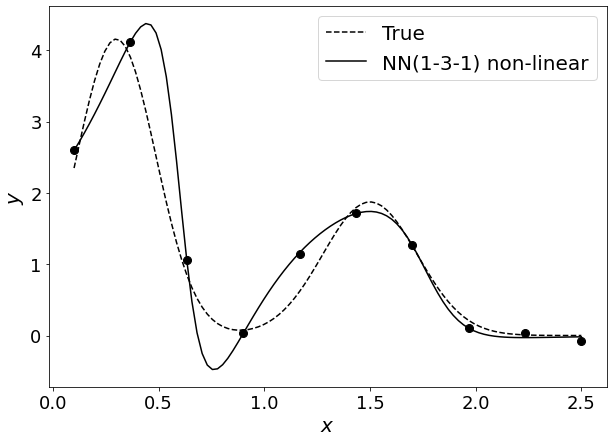

In [70]:
import matplotlib.pyplot as plt

X=torch.Tensor(x.reshape(-1,1))
Y_pred=model(X)

fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(1,1,1)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.plot(x, t, '--', color='k', label="True")
ax.plot(X_train, Y_train, 'o', markersize=8, color='k')
plt.plot(x, Y_pred.detach().numpy(), color='k', label="NN(1-3-1) non-linear")

ax.legend(fontsize=20)

ax.set_xlabel('$x$', fontsize=20)
ax.set_ylabel('$y$', fontsize=20)

plt.show()

In [76]:
torch.manual_seed(0)

model=torch.nn.Sequential(
    torch.nn.Linear(D_in,H),
    torch.nn.Linear(H,D_out)
)

loss_fn=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(model.parameters(), lr=0.15)

train(X_train_torch,Y_train_torch, model, loss_fn, optimizer)

Iter:  1000, Loss: 7.770417
Iter:  2000, Loss: 7.770416
Iter:  3000, Loss: 7.770416
Iter:  4000, Loss: 7.794822
Iter:  5000, Loss: 7.770416


In [80]:
torch.manual_seed(0)

P=6
X_poly=np.array([X_train**i for i in range(0, P+1)]).T
X_train_torch=torch.Tensor(X_poly)
Y_trian_torch=torch.Tensor(Y_train)

D_in,H,D_out=P+1, 3, 1

model=torch.nn.Sequential(
        torch.nn.Linear(D_in,H),
        torch.nn.Linear(H,D_out)
)

loss_fn=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.999,0.999))

train(X_train_torch, Y_train_torch, model, loss_fn, optimizer, max_iter=70000, log=5000)


Iter:  5000, Loss: 7.155282
Iter: 10000, Loss: 5.722231
Iter: 15000, Loss: 3.870878
Iter: 20000, Loss: 3.667485
Iter: 25000, Loss: 3.431200
Iter: 30000, Loss: 3.099442
Iter: 35000, Loss: 2.657072
Iter: 40000, Loss: 2.158529
Iter: 45000, Loss: 1.710842
Iter: 50000, Loss: 1.337570
Iter: 55000, Loss: 1.037892
Iter: 60000, Loss: 0.805715
Iter: 65000, Loss: 0.624038
Iter: 70000, Loss: 0.473470


In [ ]:
|